# STAT 207 Lab 10: Linear Regression + Logistic Regression - [25 total points] - Solutions

Due: Wednesday, April 14 11:59pm CST

We will conduct two case studies in this lab.

## <u>Case Study 1</u>: What Factors Predict the Number of Instagram Account Followers?
First, we are interested to learn more about what aspects of an Instagram account (both fake and real) are useful predictors of the number of *followers* that an Instagram account has. First, we will consider the following explanatory variables.
* the number of accounts someone *follows*
* whether the account is fake or real
* number of characters in the bio
* whether they have a profile picture or not
* number of words in name
* account type


## <u>Case Study 2</u>: What Factors Predict Whether an Instagram Account is Fake or Real?
Next, we are interested to learn more about what aspects of an Instagram account are useful in predicting whether an account is fake or real. First, we will consider the following explanatory variables.
* the number of accounts someone *follows*
* whether the account is fake or real
* number of characters in the bio
* whether they have a profile picture or not
* number of words in name
* number of *followers*

<u>Dataset Collection Information</u>: We will utilized a cleaned version of the fake instagram dataset that we used in the beginning of the class. I deleted some observations that were outliers (in terms of number of followers) and I deleted two accounts that had no followers. We can assume that this dataset is a **random sample** of all Instagram accounts.

<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## Preliminaries

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Read in the fake_insta_cleaned.csv into a dataframe.

In [4]:
df = pd.read_csv('fake_insta_cleaned.csv')

In [14]:
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,76,6,225,356,real
4,yes,1,0,6,362,424,real


<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## <u>Case Study 1</u>: What Factors Predict the Number of Instagram Account Followers?


### 1. [1 pt] Create a linear regression model with the following variables. Then print the summary output table.
* <u>response variable</u>: number of followers
* <u>explanatory variables</u>:
 - the number of accounts someone *follows*
 - whether the account is fake or real
 - number of characters in the bio
 -whether they have a profile picture or not
  - number of words in name
  - account type

In [6]:
results = smf.ols('number_of_followers ~ number_of_follows + account_type + num_characters_in_bio + has_a_profile_pic + number_of_words_in_name', data = df).fit()

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     number_of_followers   R-squared:                       0.369
Model:                             OLS   Adj. R-squared:                  0.339
Method:                  Least Squares   F-statistic:                     12.41
Date:                 Sat, 10 Apr 2021   Prob (F-statistic):           1.75e-09
Time:                         14:01:40   Log-Likelihood:                -849.63
No. Observations:                  112   AIC:                             1711.
Df Residuals:                      106   BIC:                             1728.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  163.4064    111.065      1.471      0.144     -56.791     383.604
account_type[T.real]       415.7693    130.481      3.186      0.002     157.077     674.461
has_a_profile_pic[T.yes]  -130.1005    130.241     -0.999      0.320    -388.316     128.115
number_of_follows            0.2803      0.039      7.230      0.000       0.203       0.357
num_characters_in_bio        0.6772      1.514      0.447      0.656      -2.325       3.679
number_of_words_in_name    -31.1877     49.601     -0.629      0.531    -129.526      67.151
==============================================================================
Omnibus:                      111.596   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.797
Skew:                           3.531   Prob(JB):                    3.22e-258
Kurtosis:                      17.291   Cond. No.                     5.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. [5 pt] Check the conditions for inference for this model.

Linearity Condition: Condition is not met becuase the distribution of points in the plot are not roughly evenly distributed above and below the line as we move from left to right

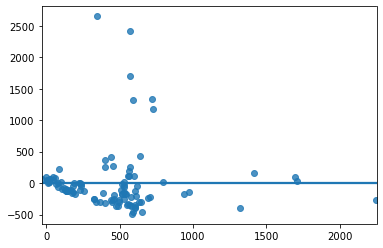

In [9]:
sns.regplot(x = results.fittedvalues, y = results.resid, ci = None)
plt.show()

Constant Variability of Residuals Condition: Condition is not met becuase the y-axis spread of points in the plot changes as we move from left to right

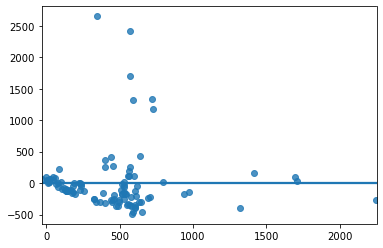

In [10]:
sns.regplot(x = results.fittedvalues, y = results.resid, ci = None)
plt.show()

Normality of Residuals Condition: Not met becuase distribution is not symmetric and is right-skewed

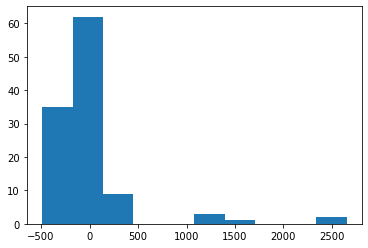

In [12]:
plt.hist(results.resid)
plt.show()

Independence of Residuals Condition: Condition is not violated bcause sample is random and n < 10 % of all instagram users

No Multicollinearity Condition: Condition is met becuase there is not a strong linear relationship between any two numerical explanatory variables

In [16]:
df[['number_of_follows', 'num_characters_in_bio','number_of_words_in_name']].corr()

,number_of_follows,num_characters_in_bio,number_of_words_in_name
number_of_follows,1.000000,0.016434,-0.034764
num_characters_in_bio,0.016434,1.000000,0.207163
number_of_words_in_name,-0.034764,0.207163,1.000000


### 3. [1.5 pt] Next, create a new variable in your dataframe that is the natural log of the number of followers variable. 

In [18]:
df['log_number_of_followers'] = np.log(df['number_of_followers'])
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,log_number_of_followers
0,yes,1,30,35,488,604,real,6.190315
1,yes,5,64,3,35,6,real,3.555348
2,yes,2,82,319,328,668,real,5.793014
3,yes,1,76,6,225,356,real,5.416100
4,yes,1,0,6,362,424,real,5.891644


### 4. [1 pt] Now, create a new linear regression model with the following variables. Then print the summary output table.
* <u>response variable</u>: **ln(number of followers)**
* <u>explanatory variables</u>:
 - the number of accounts someone *follows*
 - whether the account is fake or real
 - number of characters in the bio
 -whether they have a profile picture or not
  - number of words in name
  - account type

In [19]:
results_log = smf.ols('log_number_of_followers ~ number_of_follows + account_type + num_characters_in_bio + has_a_profile_pic + number_of_words_in_name', data = df).fit()

In [20]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_number_of_followers   R-squared:                       0.629
Model:                                 OLS   Adj. R-squared:                  0.612
Method:                      Least Squares   F-statistic:                     36.02
Date:                     Sat, 10 Apr 2021   Prob (F-statistic):           2.14e-21
Time:                             14:46:51   Log-Likelihood:                -140.43
No. Observations:                      112   AIC:                             292.9
Df Residuals:                          106   BIC:                             309.2
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.8065      0.198     19.273      0.000       3.415       4.198
account_type[T.real]         1.3512      0.232      5.823      0.000       0.891       1.811
has_a_profile_pic[T.yes]     0.6405      0.232      2.765      0.007       0.181       1.100
number_of_follows            0.0007   6.89e-05      9.622      0.000       0.001       0.001
num_characters_in_bio        0.0023      0.003      0.843      0.401      -0.003       0.008
number_of_words_in_name     -0.1631      0.088     -1.850      0.067      -0.338       0.012
==============================================================================
Omnibus:                       31.706   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.324
Skew:                           1.100   Prob(JB):                     5.36e-16
Kurtosis:                       6.198   Cond. No.                     5.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5 [2.5 pts] Check the conditions for inference for this new model. For each of your conditions, comment on whether this condition is now closer to being met than in the previous model.

Linearity Condition: Condition is closer to being met as distribution of points in the plot are more roughly evenly distributed above and below the line as we move from left to right

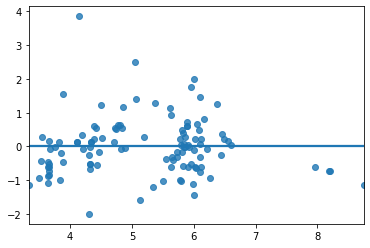

In [21]:
sns.regplot(x = results_log.fittedvalues, y = results_log.resid, ci = None)
plt.show()

Constant Variability of Residuals Condition: Condition is closer to being met because the y-axis spread of points in the plot changes less than before as we move from left to right

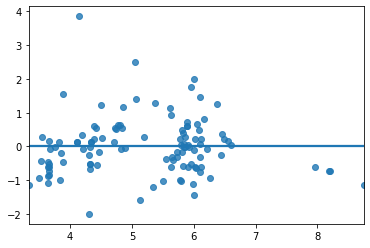

In [22]:
sns.regplot(x = results_log.fittedvalues, y = results_log.resid, ci = None)
plt.show()

Normality of Residuals Condition: More close to being met than before becuase distribution is more symmetric but is still right-skewed

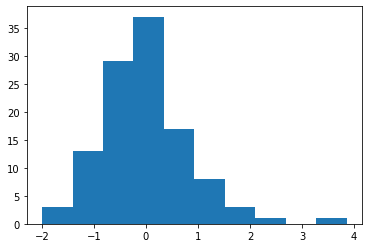

In [24]:
plt.hist(results_log.resid)
plt.show()

Independence of Residuals Condition: Condition is not violated because sample is random and n < 10 % of all instagram users

No Multicollinearity Condition: Condition is met becuase there is not a strong linear relationship between any two numerical explanatory variables

In [25]:
df[['number_of_follows', 'num_characters_in_bio','number_of_words_in_name']].corr()

,number_of_follows,num_characters_in_bio,number_of_words_in_name
number_of_follows,1.000000,0.016434,-0.034764
num_characters_in_bio,0.016434,1.000000,0.207163
number_of_words_in_name,-0.034764,0.207163,1.000000


### 6. [1 pt] Ariana Grande (currently) has 4776 posts, follows 781 accounts, has two words in the account name, is a real account, has 32 characters in her bio, and has a profile picture. Use this regression equation to predict how many *followers* she has.

In [ ]:
results_log = smf.ols('log_number_of_followers ~ number_of_follows + account_type + num_characters_in_bio + has_a_profile_pic + number_of_words_in_name', data = df).fit()

In [26]:
results_log.predict(exog = dict(number_of_follows = 781, account_type = 'real', num_characters_in_bio = 32, has_a_profile_pic = 'yes', number_of_words_in_name = 2))

0    6.062551
dtype: float64

In [27]:
np.exp(6.062551)

429.46961763291745

429.46961763291745 followers

### 7  [1 pt] Ariana Grande (currently) actually has about 230,000,000 followers on Instagram. Calculate the residual of this prediction.

In [29]:
 230000000 - 429.46961763291745
    

229999570.53038236

### 8. We have a hunch that at least one of the population slopes for num_characters_in_bio or number_of_words_in_name is non-zero in the population linear regression model with the same set of variables.
* <u>response variable</u>: **ln(number of followers)**
* <u>explanatory variables</u>:
 - the number of accounts someone *follows*
 - whether the account is fake or real
 - number of characters in the bio
 -whether they have a profile picture or not
  - number of words in name
  - account type
  
### We will conduct a hypothesis test that will test this claim.

#### 8.1 [1 pt] Set up your hypotheses here. Make sure you label what any population parameters are that you use.

$h_o$: $B_1$ = $B_2$ = $B_3$ = $B_4$ = $B_5$ = 0


$h_o$: at least one $B_i$ $\neq$ 0

#### 8.2 [2 pt] Calculate the p-value for this test (however you like).

In [32]:
from scipy.stats import f
p_value = 1 - f.cdf(36.02, dfn = 5, dfd = 112 - 5 -1)
print('pvalue: ', p_value)

pvalue:  1.1102230246251565e-16


#### 8.3 [1 pt] Use this p-value to make a conclusion using a significance level of $\alpha=0.01$.

Becuase the pvalue < $\alpha$, we reject the null and say that there is sufficient evidence to suggest the alternative hypothesis

<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## <u>Case Study 2</u>: What Factors Predict Whether an Instagram Account is Fake or Real?

Now, we are interested in creating a logistic regression model that predicts whether an account is fake.

### 9. [1 pt] First, create a new variable y in your dataframe that is equal to 1 when the account is fake, and equal to 0 when the account is real.


In [35]:
df['y'] = df['account_type'].map({'real' : 0, 'fake' : 1})
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type,log_number_of_followers,y
0,yes,1,30,35,488,604,real,6.190315,0
1,yes,5,64,3,35,6,real,3.555348,0
2,yes,2,82,319,328,668,real,5.793014,0
3,yes,1,76,6,225,356,real,5.416100,0
4,yes,1,0,6,362,424,real,5.891644,0


### 10.  [1.5 pt]  Now, create a logistic regression model which has the following variables. Then print the summary output table.
* <u>response variable</u>: account type
* <u>explanatory variables</u>:
    * the number of accounts someone *follows*
    * whether the account is fake or real
    * number of characters in the bio
    * whether they have a profile picture or not
    * number of words in name
    * number of *followers*
    
Remember, the level of the account type that we are interested in predicting the probability of is 'fake.'

In [36]:
mod1 = smf.logit(formula = 'y ~ number_of_follows + num_characters_in_bio + has_a_profile_pic + number_of_words_in_name + number_of_followers', data = df).fit()
mod1.summary()

         Current function value: 0.125713
         Iterations: 35


/Users/anahi/opt/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  112
Model:                          Logit   Df Residuals:                      106
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.8185
Time:                        15:32:11   Log-Likelihood:                -14.080
converged:                      False   LL-Null:                       -77.561
Covariance Type:            nonrobust   LLR p-value:                 1.050e-25
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  104.2533   5.06e+05      0.000      1.000   -9.91e+05    9.91e+05
has_a_profile_pic[T.yes]   -99.8190   5.06e+05     -0.000      1.000   -9.91e+05    9.91e+05
number_of_follows            0.0091      0.003      3.376      0.001       0.004       0.014
num_characters_in_bio       -0.1103      0.044     -2.496      0.013      -0.197      -0.024
number_of_words_in_name     -1.1747      0.559     -2.103      0.035      -2.269      -0.080
number_of_followers         -0.0280      0.009     -3.194      0.001      -0.045      -0.011
============================================================================================

Possibly complete quasi-separation: A fraction 0.50 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 11.  [1 pt]  Use this model to predict the probability that Ariana Grande's Instagram account is fake.
<u>Remember</u>: This account (currently) has
* 4776 posts, 
* follows 781 accounts, 
* has two words in the account name,
* has 32 characters in her bio, 
* has a profile picture, and
* has 230,000,000 followers.

In [38]:
mod1.predict(exog = dict(has_a_profile_pic = 'yes', number_of_follows = 781, num_characters_in_bio = 32, number_of_words_in_name = 2, number_of_followers = 230000000))

/Users/anahi/opt/miniconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


0    0.0
dtype: float64

In [41]:
odds = np.exp(0)
odds

1.0

real account becuase 1 indicates real 

### 12.  [1.5 pt]  If we were to increase the number of followers of an account by 1, by what *multiple* would we expect the odds of this account being fake to change? Would the odds decrease or increase?

In [42]:
np.exp(-0.0280)

0.9723883668012469

we would expect the odds of this account being fake to increase by a factor of 0.9723883668012469, all else held equal, if the number of followers increases by 1

### 13. [3 pt] Create a 99% confidence interval for the population <u>odds multiplier</u>  that corresponds to the number of characters in the bio (ie. $e^{\beta_3}$).

In [48]:
point_estimate = -0.1103
print('point estimate: ', point_estimate)

standard_error = 0.044
print('standard error: ', standard_error)

from scipy.stats import norm
critical_value = norm.ppf(.995)
print('critical value: ', critical_value)

lower = point_estimate - (critical_value * standard_error)
upper = point_estimate + (critical_value * standard_error)
print('99% Confidence Interval for number of characters in bio population slope: \n(',lower, ',', upper, ')')

point estimate:  -0.1103
standard error:  0.044
critical value:  2.5758293035489004
99% Confidence Interval for number of characters in bio population slope: 
( -0.2236364893561516 , 0.0030364893561516115 )


In [50]:
exp_lower = np.exp(lower)
exp_upper = np.exp(upper)

print('99% Confidence Interval for Number of Characters in Bio Odds Multiplier: \n(',exp_lower, ',', exp_upper, ')')

99% Confidence Interval for Number of Characters in Bio Odds Multiplier: 
( 0.7996057467456433 , 1.0030411041597085 )
